# exploration of "iris" dataset
https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#Load Dataset
frogs = pd.read_csv("Frogs_MFCCs.csv")
#
obs = frogs.shape[0]
dims = frogs.shape[1]-4
print(f'shape: {obs} observations, {dims} features')
print(f'columns: {frogs.columns.values}') 
print(f'Species: \n{frogs["Species"].value_counts()}')

shape: 7195 observations, 22 features
columns: ['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22' 'Family' 'Genus' 'Species'
 'RecordID']
Species: 
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64


In [71]:
frogs.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [72]:
label_cols = ['Family' ,'Genus' ,'Species', 'RecordID']
data_cols = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']


In [81]:
df_labels = frogs.drop(data_cols, axis = 1)
df = frogs.drop(label_cols, axis = 1)
frogs_norm = (df-df.mean())/(df.std())
frogs_norm = pd.concat((frogs_norm, df_labels), 1)
frogs_norm.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,0.146568,-0.780448,-1.581659,-1.529838,1.168584,1.352233,0.597077,-1.287100,-1.672217,0.540352,...,-1.427192,-1.007608,0.483443,1.177824,1.023868,-0.595657,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,0.146568,-0.695391,-1.556571,-1.107557,1.300532,1.415261,0.363071,-1.909720,-1.876481,0.903898,...,-1.301322,-0.758437,0.171669,0.779185,0.565617,-0.474003,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,0.146568,-0.783280,-1.495849,-0.990904,0.915472,0.763445,0.058988,-2.079619,-1.940504,1.388994,...,-1.009536,-0.369932,-0.208947,0.299009,0.777590,-0.084292,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,0.146568,-0.453647,-0.729486,-0.727045,1.505889,2.184716,0.098585,-1.667874,-1.264711,1.686691,...,-1.627534,-2.180875,-0.981570,-0.016164,-0.704731,-0.515329,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,0.146568,-1.078268,-1.440341,-0.867165,1.252911,1.255732,0.048310,-2.279006,-1.681000,1.655683,...,-0.996448,-0.717886,-0.473393,0.232516,0.897150,-0.067426,Leptodactylidae,Adenomera,AdenomeraAndre,1


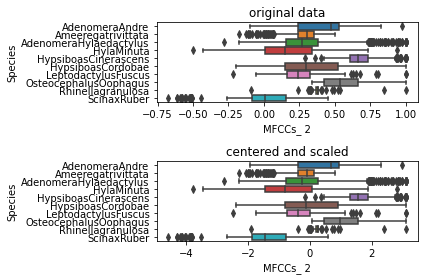

In [83]:
fig, ax = plt.subplots(2,1)

feat = "MFCCs_ 2"
sns.boxplot(y="Species",x=feat, data=frogs, ax=ax[0]).set(title='original data') 
sns.boxplot(y="Species",x=feat, data=frogs_norm, ax=ax[1]).set(title='centered and scaled')
fig.tight_layout()

plt.show()

In [85]:
frogs_norm.to_csv('Frogs_MFCCs_n.csv', index = False)